In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [8]:
#A Simple Calculator to look at the effects of mortgage parameters
#Initial parameters
interest = 0.04
years = 20
payments_year = 12 #Payments per year
mortgage = 420_000 #The Ammount you need to borrow

#The date you purchase the property/interest starts accruing 
start_date = (date(2023, 1, 1))

In [9]:

#Setting uup the initial parmeters for the mortgage schedule
rng = pd.date_range(start_date, periods=years * payments_year, freq='MS')
rng.name = "Payment Date"
df = pd.DataFrame(index=rng, columns=['Mortgage Payment', 'Principal Paid', 'Interest Paid', 'Mortgage Balance'], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Period"


#Loading values into DataFrame
df["Mortgage Payment"] = -1*np.pmt(interest/12, years*payments_year,mortgage)
df["Principal Paid"] = -1*np.ppmt(interest/payments_year, df.index, years*payments_year,mortgage)
df["Interest Paid"]  = -1*np.ipmt(interest/payments_year, df.index, years*payments_year,mortgage)


df["Mortgage Balance"]=0
df.loc[1,"Mortgage Balance"] = mortgage-df.loc[1,"Principal Paid"]


#I really can't figure out what this does 
for period in range(2, len(df)+1):
    previous_balance = df.loc[period-1, 'Mortgage Balance']
    principal_paid = df.loc[period, "Principal Paid"]
    
    if previous_balance == 0:
        df.loc[period, ['Mortgage Payment', 'Principal Paid', 'Interest Paid', 'Mortgage Balance']] == 0
        continue
    elif principal_paid <= previous_balance:
        df.loc[period, 'Mortgage Balance'] = previous_balance - principal_paid
        
#printing the start/end periods
df.head(5).append(df.tail(5)).round(2)

,Payment Date,Mortgage Payment,Principal Paid,Interest Paid,Mortgage Balance
Period,,,,,
1,2023-01-01,2545.12,1145.12,1400.00,418854.88
2,2023-02-01,2545.12,1148.93,1396.18,417705.95
3,2023-03-01,2545.12,1152.76,1392.35,416553.18
4,2023-04-01,2545.12,1156.61,1388.51,415396.58
5,2023-05-01,2545.12,1160.46,1384.66,414236.12
236,2042-08-01,2545.12,2503.12,42.00,10096.19
237,2042-09-01,2545.12,2511.46,33.65,7584.73
238,2042-10-01,2545.12,2519.83,25.28,5064.90
239,2042-11-01,2545.12,2528.23,16.88,2536.66


In [10]:
# Creating a new Analysis. This Time we compare two situations:
#A: paying mortgage on the property (but not rent).
#B: Not paying a mortgage, but paying rent and investing the difference

#      Assumptions:

#In A: The mortgage interest is fixed for life
#      No taxes paid (you live in your house). House value growth is capital gains tax exempt.
#      House Value Growth is proportional to rental growth. 

#In B: Rent increases every month.
#      You initially invest the money you would have spent on a deposit
#      You invest the difference between the rental payments and what you would have paid on a mortgage.
#      Capitial Gains tax must be paid at the end of the Analysis

In [11]:

#Initial parameters
inflation = 0.02
rent_growth = inflation
initial_rent = 1_000
downpayment=30_000

initial_invest = downpayment
ror = 0.08
monthly_ror = (1+ror)**(1/12)-1
cgt = .33

In [12]:
#Preparing the dataframe for mortgage and investment data
rng = pd.date_range(start_date, periods=years * payments_year, freq='MS')
rng.name = "Payment Date"
rng2 = pd.date_range(start_date, periods=years * payments_year, freq='MS')
rng2.name = "Investment Date"
df = pd.DataFrame(index=rng, columns=['Mortgage Payment', 'Principal Paid', 'Interest Paid', 'Mortgage Balance',
                                      'Equities Invested', 'Rent', "Surplus To Invest"], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Period"


#Case A: Calculateing the Mortgage Payments
df["Mortgage Payment"] = -1*np.pmt(interest/12, years*payments_year,mortgage)
df["Principal Paid"] = -1*np.ppmt(interest/payments_year, df.index, years*payments_year,mortgage)
df["Interest Paid"]  = -1*np.ipmt(interest/payments_year, df.index, years*payments_year,mortgage)

df["Mortgage Balance"]=0
df.loc[1,"Mortgage Balance"] = mortgage-df.loc[1,"Principal Paid"]

for period in range(2, len(df)+1):
    previous_balance = df.loc[period-1, 'Mortgage Balance']
    principal_paid = df.loc[period, "Principal Paid"]
    
    if previous_balance == 0:
        df.loc[period, ['Mortgage Payment', 'Principal Paid', 'Interest Paid', 'Mortgage Balance']] == 0
        continue
    elif principal_paid <= previous_balance:
        df.loc[period, 'Mortgage Balance'] = previous_balance - principal_paid

        
#Case B: Paing rent home and investing in stocks
df["Rent"] = initial_rent*(1+rent_growth)**(df.index/12)
df["Surplus To Invest"] = df["Mortgage Payment"]-df["Rent"]


#Calculating monthly net value of stock portfolio
df.loc[1,'Equities Invested'] = initial_invest
for period in range(2, len(df)+1):
    df.loc[period, 'Equities Invested'] = df.loc[period-1, 'Equities Invested']*(1+monthly_ror) + df.loc[period-1, 'Surplus To Invest']
    

df.head(5).append(df.tail(5)).round(2)

,Payment Date,Mortgage Payment,Principal Paid,Interest Paid,Mortgage Balance,Equities Invested,Rent,Surplus To Invest
Period,,,,,,,,
1,2023-01-01,2545.12,1145.12,1400.00,418854.88,30000.00,1001.65,1543.47
2,2023-02-01,2545.12,1148.93,1396.18,417705.95,31736.49,1003.31,1541.81
3,2023-03-01,2545.12,1152.76,1392.35,416553.18,33482.49,1004.96,1540.15
4,2023-04-01,2545.12,1156.61,1388.51,415396.58,35238.07,1006.62,1538.49
5,2023-05-01,2545.12,1160.46,1384.66,414236.12,37003.29,1008.29,1536.83
236,2042-08-01,2545.12,2503.12,42.00,10096.19,888665.67,1476.17,1068.95
237,2042-09-01,2545.12,2511.46,33.65,7584.73,895452.32,1478.61,1066.51
238,2042-10-01,2545.12,2519.83,25.28,5064.90,902280.19,1481.05,1064.07
239,2042-11-01,2545.12,2528.23,16.88,2536.66,909149.55,1483.50,1061.62



	Case A: Owning and living in your home

Initial home value 		= 450,000.00
Final Homevalue 		= 668,676.33


	Case B: Investing in stocks and paing rent home

Value of equities before CGT	= 916,060.67
Value of equities after CGT 	= 762,260.65




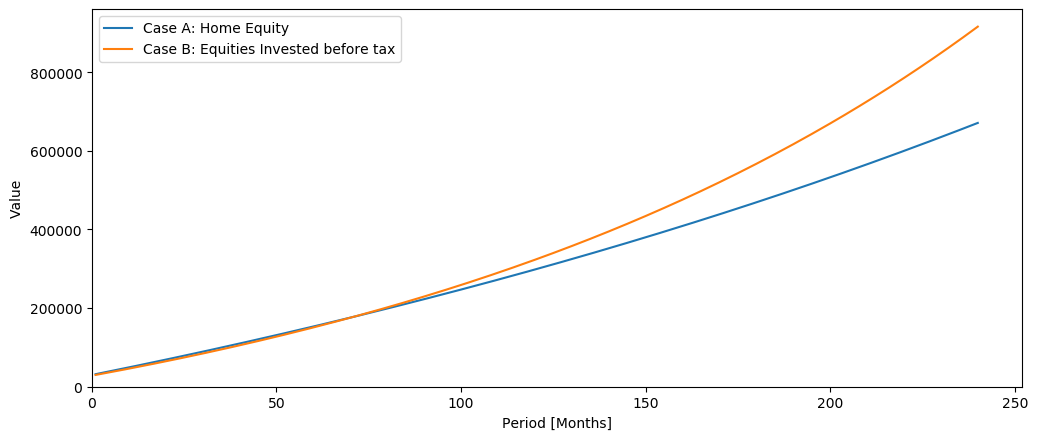

In [13]:
#Analysis
init_homevalue = (mortgage+downpayment)
final_homevalue = init_homevalue*(1+rent_growth)**years




df['home_equity'] = (init_homevalue*(1+rent_growth/12)**df.index)-df['Mortgage Balance']
plt.figure(figsize=(12,5), dpi=100)

plt.plot(df['home_equity'], label='Case A: Home Equity')
plt.plot(df['Equities Invested'], label='Case B: Equities Invested before tax')

plt.xlim(0)
plt.ylim(0)
plt.xlabel('Period [Months]')
plt.ylabel('Value')
plt.legend()



print("\n\tCase A: Owning and living in your home\n")
print("Initial home value \t\t= "f'{init_homevalue:,.2f}')
print("Final Homevalue \t\t= " f'{final_homevalue:,.2f}')


print("\n\n\tCase B: Investing in stocks and paing rent home\n")

gross_value = df.loc[len(df),'Equities Invested']
net_value = gross_value-cgt*(gross_value-init_homevalue)
print("Value of equities before CGT\t= " f'{gross_value:,.2f}')
print("Value of equities after CGT \t=",f'{net_value:,.2f}\n\n')